<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=5>
<center>
به نام خداوند بخشنده‌ی مهربان
<br><br><br>
تمرین پنجم - سوال پنجم
<br><br>
</center>

</font>
    
<font face="XB Zar" size=3>
    
* در این تمرین آزادید سلول‌های جدید کد یا فایل‌های جدید `ipynb.`  یا `py.` را ایجاد کنید و کد موجود در آنها را مورد فراخوانی و استفاده قرار دهید. اما دقت کنید کد نهایی شما که باعث تولید پاسخ‌ها می‌شود بایستی از طریق فراخوانی‌های موجود در همین دفترچه اجرا شود.
* سوالات خودتان را از طریق وبسایت کوئرا بپرسید.

</font>
</div>

<hr><hr><hr>
<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=6>
<font style="color:blue;"><strong>پرسش ۱</strong> </font>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در این مساله می‌خواهیم استفاده از تکنیک double buffering  برای سرعت بخشیدن به الگوریتم external merge sort را بررسی کنیم. با این الگوریتم در اسلاید‌های درس آشنا شده‌اید.
<br>
گرچه این الگوریتم و هزینه‌ی آن را به صورت صریح و دقیق در اسلاید‌ها مدل نکرده‌ایم، می‌دانیم دسترسی به داده‌های نوشته شده در حافظه با locality بالا سریعتر از دسترسی تصادفی است. یعنی دسترسی به page های متوالی حافظه از طریق sequential IO سریعتر از random IO است.
<br>
به بیانی دیگر خواند ۸ صفحه‌ی متوالی از فایل A و سپس خواند ۸ صفحه‌ی متوالی از فایل B بسیار سریعتر از خواند یکی در میان صفحات A و B است.
<br>
همچنین در تکنولوژی‌های حافظه‌ی امروزی خواندن اطلاعات از حافظه معمولا سریعتر از نوشتن آن است.
<br><br>
در این مساله مدلی برای این تفاوت‌ها ارايه می‌کنیم.

* فرض می‌کنیم هر حداکثر ۸ 
<font style="color:red;"><strong>خواندن</strong> </font>
    متوالی از حافظه معادل تنها یک خواندن هزینه دارد و هزینه‌ی آن ۱ واحد IO است.
* فرض می‌کنیم هزینه‌ی هر نوشتن دو برابر هزینه‌ی هر خواندن باشد.
* نوشتن‌های متوالی مانند خواندن بدون هزینه نیستند. هزینه‌ی $N$ نوشتن متوالی همیشه $2N$ است.
<br><br>
نکات مهم دیگر:
* برای این مساله الگوریتم merge sort را همان الگوریتم ارائه شده در اسلاید‌ها با optimization های اولیه در نظر بگیرید اما از Repacking Optimization استفاده نکنید.
* فرض کنید یکی از page های buffer برای خروجی استفاده می‌شود و رزرو شده است. به عنوان مثال در این حالت یک merge $B$ طرفه نیازمند $B + 1$ page از buffer خواهد بود.
* در محاسبات خود همواره اعداد به‌دست آمده را رند کنید و از هزینه‌های به دست آمده <font style="color:red;"><strong>سقف</strong> </font> بگیرید.
* همواره بدترین حالت ممکن (worst case scenario) را در محاسبات لحاظ کنید. به عنوان مثال اگر دو خواندن می‌توانند در حالت‌هایی متوالی باشند اما این توالی کلیت ندارد این دو خواندن را random IO در نظر بگیرید.
</font>    
</div>

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف
<br>
الگوریتم external merge sort را به گونه‌ای تغییر می‌دهیم که با هدف استفاده از خواندن‌های بدون هزینه‌ی متوالی، تمام عملیات خواند به صورت 
<font style="color:red;"><strong>خواندن ۸ صفحه‌ی متوالی از حافظه</strong></font>
انجام شود.
<br><br>
هزینه‌ی اجرای الگوریتم external merge sort را با $B + 1 = 40$ صفحه‌ی buffer و فایل ورودی نامرتب ۳۲۰ صفحه‌ای محاسبه کنید.
<br>
مراحل و منطق کارتان را با استفاده از comment های پایتون در سلول جواب شرح دهید.
</font>    
</div>

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۱
<br>
هزینه‌ی دقیق split کردن و مرتب سازی فایل‌های حاصل را بر حسب واحد IO محاسبه کنید.
<br>
طبق حالت استاندارد، اجرا‌های با اندازه‌ی $B + 1$ مورد نظر هستند.
</font>
</div>

In [1]:
# We must read every page once and write it out after sorting. 
# Number of runs = (number of pages) / (run size = B + 1) = 320 / 40 = 8 number of runs
# to calculate the IO cost of reading we use the IO cost of reading the sequential chunks in a run.
# IO cost for each run when we read -> [(40 pages in each run)/(8 pages are read in chunk)] * (1 IO cost per each chunk read) = 5 IO cost per run
# to calculate the IO cost of writing we have to write each page and each have a IO cost of 2.
# IO cost for each run when we write -> (40 writes in each run) * (2 IO cost per each page write) = 80 IO cost per run
# so the total IO cost (all runs) -> (IO cost for reads per run + IO cost for writes) * Number of runs
# IO cost = (5 + 80) * 8 = 680

io_split_sort = 680

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۲
<br>
بعد از آنکه فایل ورودی قسمت قسمت شده و هر قسمت به صورت جداگانه مرتب شد، می‌توانیم با استفاده از فرایند merge هر $n$ اجرا را با هم ادغام کنیم. 
<br>
با فرض آنکه عملیات read همواره به صورت ۸ صفحه‌ای انجام می‌شود،
بزرگترین $n$ ممکن چیست؟
(به این عدد درجه‌ی merge می‌گویند).
</font>
</div>

In [2]:
# We can merge B runs at once (as maximum) but reads are always in 8 page chunks.
# So the maximum n = floor(B/8) = floor((40-1)/8) = 4

merge_arity = 4

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۳
<br>
عملیات merge چندبار (چند pass) بایستی انجام شود؟
</font>
</div>

In [3]:
# If we want to merge N pages there will be ceiling[log_{base=merge_arity} {N/(B+1)}] passes of merging necessary.
# So the result is = ceiling(log_{base=4}{320/40}) = 2

merge_passes = 2

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۴
<br>
هزینه‌ی اولین اجرای (pass) فرایند merge بر حسب واحد IO چقدر است؟ 
دقت کنید که عملیات merge با بالاترین درجه ممکن بایستی استفاده شود.
</font>
</div>

In [4]:
# We need to read all pages once and write them all once in one merge pass.
# As before we know that all reads are done in 8 page chunks.
# IO cost for reads = (number of pages) / (pages in chunk) * IO cost for reading a chunk = 320 / 8 * 1 = 40
# IO cost for writes = (number of pages) * IO cost for writing a page = 320 * 2 = 640
# total IO cost of a single merge pass = 40 + 640 = 680

merge_pass_1 = 680

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۵
<br>
هزینه‌ی کلی اجرای الگوریتم external merge sort بر حسب واحد IO چقدر است؟
(در صورتی که pass های دیگری از merge باقی مانده است بایستی هزینه‌ی آنها را نیز در محاسبات خود در نظر بگیرید.)
</font>
</div>

In [5]:
# Total IO cost = split & sort IO cost + number of passes * IO cost of one merge pass
# 680 + 680 * 2 = 2040

total_io = 2040

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب
<br>
در این بخش پاسخ‌ها و استدلالی را که در بخش قبل مورد استفاده قرار دادیم، تعمیم خواهیم داد. تابعی به زبان python می‌نویسیم که تخمینی از هزینه‌ی IO اجرای الگوریتم external merge sort را با استفاده از یک بافر $B+1$ صفحه‌ای برای یک فایل نامرتب $N$ صفحه‌ای محاسبه کند. در اینجا عملیات خواندن را به جای ۸ صفحه‌ی متوالی در $P$ صفحه‌ی متوالی انجام خواهیم داد.
<br>
دقت کنید نتیجه‌ی تابع ما تنها به این علت تخمینی از هزینه‌ی واقعی است که در آن هزینه‌ی هر pass عملیات merge را با دیگر pass ها برابر در نظر می‌گیریم حال آنکه در عمل این هزینه‌ها می‌توانند با یکدیگر تفاوت داشته باشند. بقیه‌ی محاسبات طبق مدلی که ارئه کردیم بایستی دقیق باشند.
<br>
این تابع را (external_merge_sort_cost(B, N, P می‌نامیم.
نتیجه‌ی آن را به صورت ترکیب هزینه‌ی خواندن و نوشتن داده‌ها در هر pass و تعداد pass های مورد نیاز محاسبه خواهیم کرد.
<br>
دقت کنید که با وجود آنکه نتیجه‌ی این تابع تخمینی از هزینه‌ی واقعی است، شما بایستی به دقت و هر جا که لازم است در محاسبات خود از نتایج کف یا سقف بگیرید که نتایج اعداد صحیح درستی باشند.
</font>    
</div>

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۱
<br>
تابع پایتونی بنویسید که هزینه‌ی 
<font style="color:red;"><strong>دقیق</strong></font>
تمام عملیات اولیه‌ی الگوریتم را بر حسب واحد IO محاسبه کند.
</font>
</div>

In [6]:
def cost_initial_runs(B, N, P):
    write = 2 * N
    read = N/P
    return write + read

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۲
<br>
تابع پایتونی بنویسید که هزینه‌ی تخمینی 
خواندن ورودی و نوشتن خروجی را در یک pass از عملیات merge محاسبه کند.
<br>
دقت کنید این هزینه از آنجایی یک تخمین است که فایل ورودی در ابتدای الگوریتم به بخش‌هایی تقسیم شده که لزوما یک اندازه نیستند و بالتبع کار کردن با آنها نیز هزینه‌هایی با تفاوت اندک خواهد داشت.
</font>
</div>

In [7]:
def cost_per_pass(B, N, P):
    write_all = 2 * N
    read_all = N/P
    return write_all + read_all

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۳
<br>
تابع پایتونی بنویسید که تعداد 
<font style="color:red;"><strong>دقیق</strong></font>
دفعات مورد نیاز اجرای الگوریتم merge را محاسبه کند.
</font>
</div>

In [8]:
import math
def num_passes(B, N, P):
    # As we saw before -> ceiling[log_{base=merge_arity} {N/(B+1)}]
    # Here we have B/P for the base but just like the part(الف) we have to get the floor of B/P
    return math.ceil(math.log(N/(B+1), math.floor(float(B)/float(P))))

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در نهایت هزینه‌ی کلی به این صورت محاسبه می‌شود: 
</font>
</div>

In [9]:
def external_merge_sort_cost(B, N, P):
    return cost_initial_runs(B,N,P) + cost_per_pass(B,N,P)*num_passes(B,N,P)

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
پ
<br>
عدد $P$ بهینه و زوج مرتب‌های مقادیر ممکن $P$ و هزینه‌ی IO متناظر با آنها را با استفاده از تابع هزینه‌ی کلی که در قسمت قبل نوشتید پیدا کنید.
<br>
فرض کنید که 
    $B + 1 = 100$ و $N = 900$.
</font>    
</div>

In [21]:
# Save the optimal value here

P = 0 # WE CAN CALCULATE THIS ONLY AFTER TRYING FOR ALL P_VALUES SO THE REAL OPTIMAL P WILL BE SAVED IN THE 
# LAST LINE OF THIS PART CODE.

B = 100 - 1
N = 900

# Save a list of tuples of (P, io_cost) here, for all feasible P's
p_values = [i for i in range(1, B//2) ]
points = [(p_val, external_merge_sort_cost(B, N, p_val)) for p_val in p_values]

# FIND THE OPTIMAL P:
min_cost = points[0][1]
optimal_p = points[0][0]
for p_val, IO_cost in points:
    if IO_cost < min_cost:
        min_cost = IO_cost
        optimal_p = p_val
print "The optimal P =", optimal_p

P = optimal_p

The optimal P = 11


<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در اینجا قطعه کد راهنمایی برای استفاده از کتابخانه‌ی `matplotlib` برای تبدیل نقاط به دست آمده به نمودار در اختیار شما قرار گرفته. می‌توانید از این کد یا هر نرم‌افزار دیگری که دوست دارید برای تولید نمودار نهایی استفاده کنید. نتیجه‌ی حاصل را به همراه گزارش خود ارسال کنید.
</font>
</div>

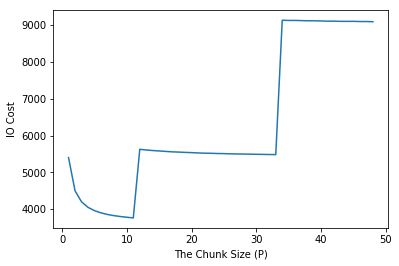

In [22]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*points))
plt.ylabel('IO Cost')
plt.xlabel('The Chunk Size (P)')
plt.show()

<hr><hr><hr>
<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=6>
<font style="color:blue;"><strong>پرسش ۲</strong> </font>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در این مساله می‌خواهیم هزینه‌ی الگوریتم‌های Join متفاوت را برای ادغام رابطه‌های $R(A,B)$، $S(B,C)$ و $T(C,D)$
دو به دو با یکدیگر مقایسه کنیم و بهترین روش Join را در چند حالت مختلف پیدا کنیم.
<br><br>
در هر یک از سناریو‌های مطرح شده می‌خواهیم مقدار تمام یا برخی از این متغیر‌ها را پیدا کنیم:
    
* `P_R`: تعداد صفحات $R$
* `P_S`: تعداد صفحات $S$
* `P_RS`: تعداد صفحات خروجی (و ورودی) $RS$
* `P_T`: تعداد صفحات $T$
* `P_RST`: تعداد صفحات خروجی (و ورودی) $RS$
* `B`: تعداد صفحات Buffer
* `IO_cost_join1`: هزینه‌ی کلی اولین Join بر حسب واحد IO
* `IO_cost_join2`: هزینه‌ی کلی دومین Join بر حسب واحد IO
<br><br>
نکات مهم:
* خروجی اولین Join همواره به عنوان یکی از ورودی‌های دومین Join داده می‌شود.
* در هیچ‌یک از الگوریتم‌های Join از Optimization های مطرح شده در Lecture ها استفاده نکنید و الگوریتم پایه را در نظر بگیرید.
* فرض کنید یکی از صفحات Buffer برای خروجی رزرو شده است.
* در این سوال از الگوریتم‌های(
Sort-Merge Join (SMJ)،
    Hash Join (HJ و
    (Block Nested Loop Join (BNLJ استفاده خواهیم‌کرد. 
</font>    
</div>

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف
<br><br><br>
با فرض:
    
* `P_R` = 20
* `P_S` = 200
* `P_T` = 2000
* `P_RS` = 100
* `P_ST` = 1000
* `P_RST` = 500
* `B` = 32
</font>    
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
هزینه‌ی IO کلی هر یک از query plan های زیر را محاسبه کنید
</font>    
</div>

* IO_Cost_HJ_1 where only hash join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_HJ_2 where only hash join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_SMJ_1 where only sort merge join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_SMJ_2 where only sort merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_BNLJ_1 where only block nested loop join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_BNLJ_2 where only block nested loop merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

<div style="direction:rtl;line-height:100%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در مورد performance هر query plan یک یا دو جمله در قالب comment های پایتون توضیح دهید. 
</font>    
</div>


In [ ]:
IO_Cost_HJ_1 = 7120
# No partitioning for the first join since R can be fit 
# join1 -> P_R + P_S + P_RS = 20 + 200 + 100 = 320
# join2 -> 3(P_RS + P_T) + P_RST = 3(100 + 2000) + 500 = 6800
# join1 + join2 = 7120

IO_Cost_HJ_2 = 9120
# join1 -> 3(P_T + P_S) + P_ST = 3(2000 + 200) + 1000 = 7600
# join2 -> P_ST + P_R + P_RST = 1000 + 20 + 500 = 1520
# join1 + join2 = 9120

IO_Cost_SMJ_1 = 16160
# join1 -> 1 pass to sort R = 2 * (P_R) = 2 * 20 = 40, 2 passes to sort S = 2 * (2 * P_S) = 4 * 200 = 800, 1 pass to merge = P_R + P_S = 100 + 2000 = 2100
# OUT = 100
# join1 = 40 + 800 + 220 + 100 = 1160
# join2 -> 2 pass to sort RS = 2 * (2 * P_RS) = 4 * 100 = 400, 3 pass to sort T = 3 * (2 * P_T) = 6 * 2000 = 12000, 1 pass to merge = P_RS + P_T = 100 + 2000 = 2100
# OUT = 500
# join2 = 400 + 12000 + 2100 + 500 = 15000
# join1 + join2 = 1160 + 15000 = 16160

IO_Cost_SMJ_2 = 23560
# join1 -> 3 passes to sort T = 3 * (2 * P_T) = 6 * 2000 = 12000, 2 passes to sort S = 2 * (2 * P_S) = 4 * 200 = 800, 1 pass to merge = 2000 + 200 = 2200
# OUT = 1000
# join1 = 12000 + 800 + 2200 + 1000 = 16000
# join2 -> 3 passes to sort TS = 3 * (2 * P_RS) = 6 * 1000 = 6000, 1 pass to sort R = 2 * P_R = 2 * 20 = 40, 1 pass to merge = 1000 + 20 = 1020
# OUT = 500
# join2 = 6000 + 40 + 1020 + 500 = 7560
# join1 + join2 = 16000 + 7060 = 23560

IO_Cost_BNLJ_1 = 8920
# join1 -> P_R + ceiling(P_R/(B-1)) * P_S + OUT(=P_RS) = 20 + ceiling(20/30) * 200 + 100 = 320
# join2 -> P_RS + ceiling(P_RS/(B-1)) * P_T + OUT(=P_RST) = 100 + ceiling(100/30) * 2000 + 500 = 8600
# join1 + join2 = 8920

IO_Cost_BNLJ_2 = 16720
# join1 -> P_S + ceiling(P_S/(B-1)) * P_T + OUT(=P_ST) = 200 + ceiling(200/30) * 2000 + 1000 = 15200
# join2 -> P_R + ceiling(P_R/(B-1)) * P_ST + OUT(=P_RST) = 20 + ceiling(20/30) * 1000 + 500 = 1520
# join1 + join2 = 16720

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب
<br><br><br>
query plan 
ای را در نظر بگیرید که در آن
$join1 = R(a,b),S(b,c)$
و 
$join2 = join1(a,b,c),T(c,d)$
.
مقداردهی از متغیر‌ها را بیابید که استفاده از HJ برای $join1$ و SMJ برای $join2$ هزینه‌ی کمتری از استفاده‌ی SMJ برای $join1$ و استفاده از HJ برای $join2$ داشته باشد.
<br>
اندازه‌ی خروجی‌هایی که برای P_RS و P_RT تعیین می‌کنید بایستی غیر صفر و مقدار درستی باشد
(حداکثر اندازه‌ی خروجی برای $join1$ برابر P_R*P_S است).
</font>    
</div>

In [ ]:
# From the last part we can see the smaller P_R will result in cheaper HJ for first join.
# But this will also lead to cheaper SMJ too. So we need to make SMJ expensive by increasing the P_S

P_R = 20 
P_S = 20000
P_T = 200
P_RS = 100
P_RST = 50
B = 40

HJ_IO_Cost_join1 = 20120
# join1 -> P_R + P_S + P_RS = 20 + 20000 + 100 = 20120

SMJ_IO_Cost_join2 = 950
# join2 -> 1 pass to sort RS = 2 * P_RS = 2 * 100 = 200, 1 pass to sort T = 2 * P_T = 2 * 200 = 400, 1 pass to merge = P_RS + P_T = 100 + 200 = 300
# OUT = 50
# join2 = 200 + 400 + 300 + 500 = 950

SMJ_IO_Cost_join1 = 140060
# join1 -> 1 pass to sort R = 2 * (P_R) = 2 * 20 = 40, ceiling(log_base(B)(P_S/B) + 1 = 3 passes to sort S = 3 * (2 * P_S) = 6 * 20000 = 120000, 1 pass to merge = P_R + P_S = 20 + 20000 = 20020
# OUT = 100
# join1 = 40 + 120000 + 20020 + 100 = 140060

HJ_IO_Cost_join2 = 950
# join2 -> 3(P_RS + P_T) + P_RST = 3(100 + 200) + 50 = 950

<hr><hr><hr>
<div style="line-height:300%;">
<font face="XB Zar" size=5>
موفّق و سلامت باشید
</font>
</div>